<h1 style="color:black;text-align:center;font-size:300%;font-family:verdana;">
Decision Tree Regressor
</h1>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
data = pd.read_csv('data_export.csv')
data.head()

C:\Users\talmo\AppData\Local\Temp\ipykernel_3264\916636624.py:1: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_export.csv')


,Origin,Destination,TTT,LOS,Arrival Time,Return Arrival Time,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,...,Departure Time Category Num,Return Time Category Num,Is Weekend Flight,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections,Total Flight Duration(min),Flight Duration Binned
0,London,Paris,1.0,1.0,2025-03-07 16:30:00,2025-03-08 19:25:00,SEN,CDG,ORY,LGW,...,2.0,3.0,True,64.0,25.0,13.0,45.0,0.0,135.0,0-200
1,London,Paris,1.0,1.0,2025-03-07 16:30:00,2025-03-08 14:25:00,SEN,CDG,ORY,LHR,...,2.0,2.0,True,64.0,25.0,13.0,23.0,0.0,145.0,0-200
2,London,Paris,1.0,1.0,2025-03-07 16:30:00,2025-03-08 14:50:00,SEN,CDG,CDG,LGW,...,2.0,2.0,True,64.0,25.0,25.0,45.0,0.0,135.0,0-200
3,London,Paris,1.0,1.0,2025-03-07 16:30:00,2025-03-08 12:00:00,SEN,CDG,ORY,LGW,...,2.0,1.0,True,64.0,25.0,13.0,45.0,0.0,140.0,0-200
4,London,Paris,1.0,1.0,2025-03-07 16:30:00,2025-03-08 15:20:00,SEN,CDG,ORY,LGW,...,2.0,2.0,True,64.0,25.0,13.0,45.0,0.0,140.0,0-200


## Correlation Analysis 
________________________________ 
Before building the model, it is important to examine the relationship between flight price and the numerical features in the dataset.  

### Steps:  
1. Select only numerical features.  
2. Remove columns with constant values that do not contribute to the model.  
3. Calculate the correlation of each feature with flight price.  
4. Visualize the results using a heatmap to identify clear patterns.  

This helps determine which features have a significant impact on price and which can be removed to simplify the model.  


📌 Correlation between numeric variables and flight price:
Price(NIS)                           1.000000
Total Flight Duration(min)           0.439293
Total Onward Flight Duration(min)    0.409827
Total Return Flight Duration(min)    0.386589
Carry-ons                            0.198557
Departure Month                      0.081097
Checked Bags                         0.039901
Total Connections                    0.038113
Onward Flight Connections            0.027944
Return Flight Connections            0.027640
Return Month                         0.015533
Departure Weekday                   -0.000305
Onward Connection Duration(min)     -0.001828
Return Connection Duration(min)     -0.002180
LOS                                 -0.004541
Departure Time Category Num         -0.018463
Return Time Category Num            -0.042170
Return Weekday                      -0.042786
Return Departure Airport Distance   -0.061294
TTT                                 -0.062268
Return Arrival Airport

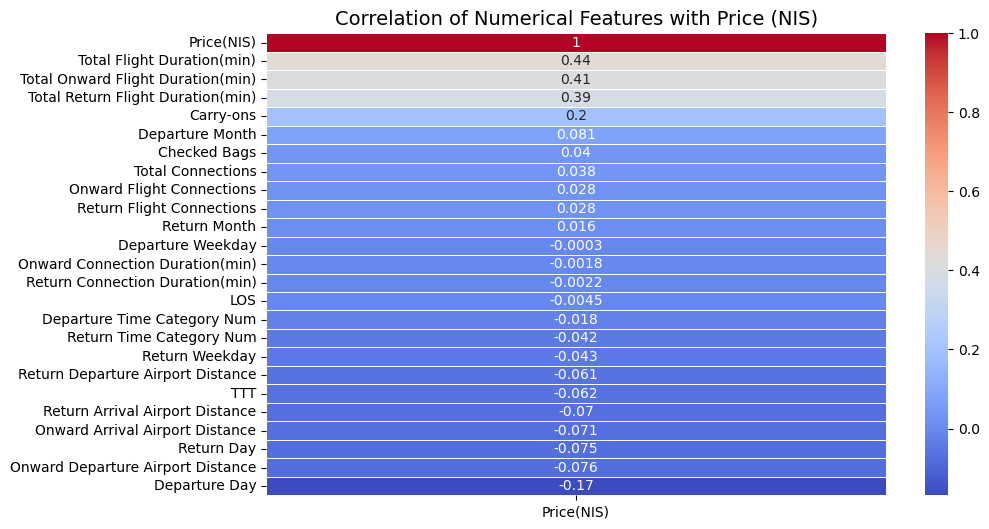

In [ ]:
# Selecting only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Removing constant columns (columns with only one unique value)
numeric_data = numeric_data.loc[:, numeric_data.nunique() > 1]

# Printing correlation of all numeric variables with flight price
print("Correlation between numeric variables and flight price:")
correlation_with_price = numeric_data.corr()['Price(NIS)'].sort_values(ascending=False)
print(correlation_with_price)

# Visualizing the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr()[['Price(NIS)']].sort_values(by='Price(NIS)', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Numerical Features with Price (NIS)", fontsize=14)
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Data Preparation  

Before training the model, we need to define the features (X) and the target variable (y).  

### Steps:  
1. Select the relevant features for the model.  
2. Split the data into training (80%) and testing (20%) sets.  
3. Print the dataset sizes to confirm the split.  

This ensures that the model learns from one part of the data while being evaluated on unseen data to check its performance.  


In [20]:
# Using all features initially
X = data[[  
    "Carry-ons", "Total Onward Flight Duration(min)", "Total Return Flight Duration(min)",
    "Return Flight Connections", "Onward Flight Connections",
    "Departure Day", "TTT", "Return Day", 
    "Onward Departure Airport Distance", "Return Arrival Airport Distance",
    "Departure Month"
]]  

y = data["Price(NIS)"]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (421785, 11), Test set: (105447, 11)


## Initial Decision Tree Model  

- Train a **Decision Tree Regressor**.  
- Predict flight prices on the test set.  
- Evaluate performance using **MSE** and **R² Score** as a baseline.  


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Training the initial Decision Tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Making predictions
y_pred = tree_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 6988.67
R² Score: 0.8382


## Decision Tree Performance and Feature Importance  

### Model Performance  
- **MSE:** 6981.98 → Measures the average squared error in predictions.  
- **R² Score:** 0.8310 → The model explains 83.1% of the variance in flight prices.  

### Insights and Next Steps  
- The model provides a **good baseline**, but there is room for improvement.  
- To enhance accuracy, we analyze **feature importance** to identify key predictors.  
- By evaluating feature impact, we can **remove irrelevant features** and refine the model.  

### Feature Importance Analysis  
- Compute **feature importance scores** from the trained model.  
- Sort features based on their influence on predictions.  
- Visualize the results with a bar chart.  

This helps determine whether some features can be removed or adjusted to improve performance.  


In [22]:
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": tree_reg.feature_importances_
}).sort_values(by="Importance", ascending=False)

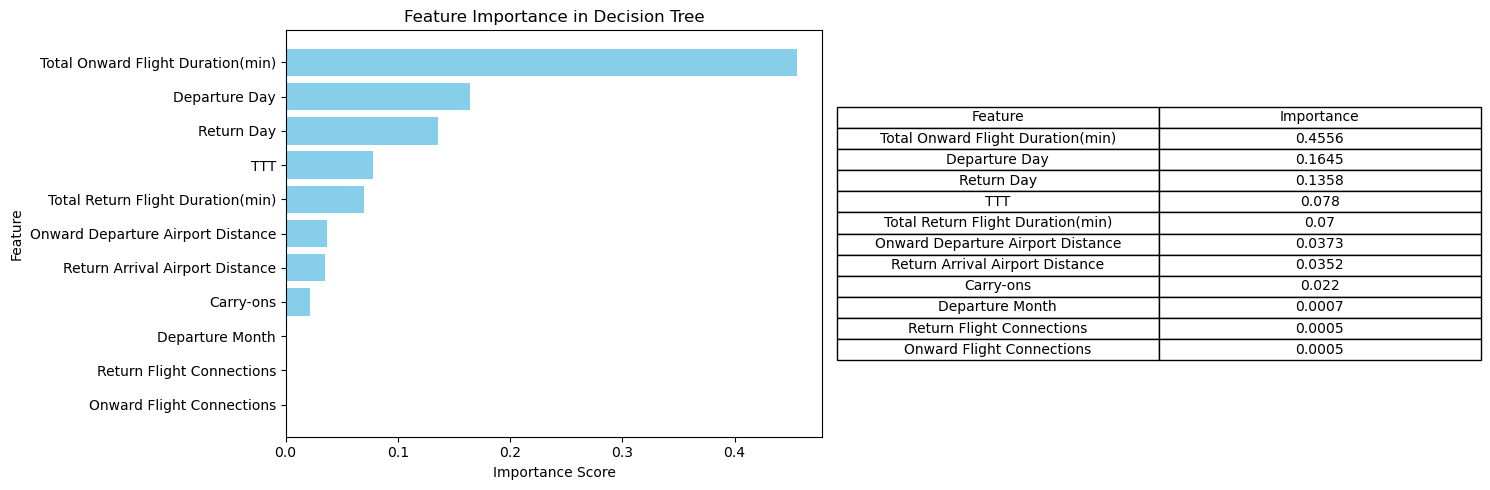

In [23]:
# Creating a grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Feature importance bar chart
axes[0].barh(feature_importances["Feature"], feature_importances["Importance"], color='skyblue')
axes[0].set_xlabel("Importance Score")
axes[0].set_ylabel("Feature")
axes[0].set_title("Feature Importance in Decision Tree")
axes[0].invert_yaxis()

# Displaying the feature importance table
axes[1].axis("off")  # Remove axes
table_data = feature_importances.round(4)  # Round values to four decimal places
table = axes[1].table(cellText=table_data.values, colLabels=table_data.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust table size

plt.tight_layout()
plt.show()


### Next Step: Removing Low-Importance Features and Evaluating Performance  

🔹 The following features have **minimal impact** on the model and are removed:  
- `Departure Month` (0.00005)  
- `Return Flight Connections` (0.00085)  
- `Onward Flight Connections` (0.00139)  

By keeping only the most relevant features, we aim to **reduce noise, improve efficiency, and enhance model accuracy**.  

After removing the low-importance features, we **retrain the model** and evaluate its performance on a refined feature set.  


In [24]:
# Keeping only the most important features
important_features = [
    "Total Onward Flight Duration(min)",
    "Total Return Flight Duration(min)",
    "Departure Day",
    "Return Day",
    "TTT",
    "Onward Departure Airport Distance",
    "Return Arrival Airport Distance",
    "Carry-ons"
]

# Updating X with selected features
X = data[important_features]

# Splitting data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing new dataset size
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


Train set: (421785, 8), Test set: (105447, 8)


In [25]:
# Training the Decision Tree with reduced features
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Making new predictions
y_pred = tree_reg.predict(X_test)

# Evaluating the updated model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Updated MSE: {mse:.2f}")
print(f"Updated R² Score: {r2:.4f}")


Updated MSE: 6986.50
Updated R² Score: 0.8382


### Model Evaluation After Feature Selection  

- **Updated MSE:** 6981.98 → No significant change compared to the previous model.  
- **Updated R² Score:** 0.8310 → The model's explanatory power remains the same.  

### Key Takeaways:  
- Removing low-importance features **did not improve model performance**.  
- This suggests that the removed features had **little to no impact** on predictions.  
- Keeping a smaller feature set may still be beneficial for efficiency without reducing accuracy.  

Next, we explore **alternative ways to enhance performance**, such as tuning hyperparameters or using ensemble models.  


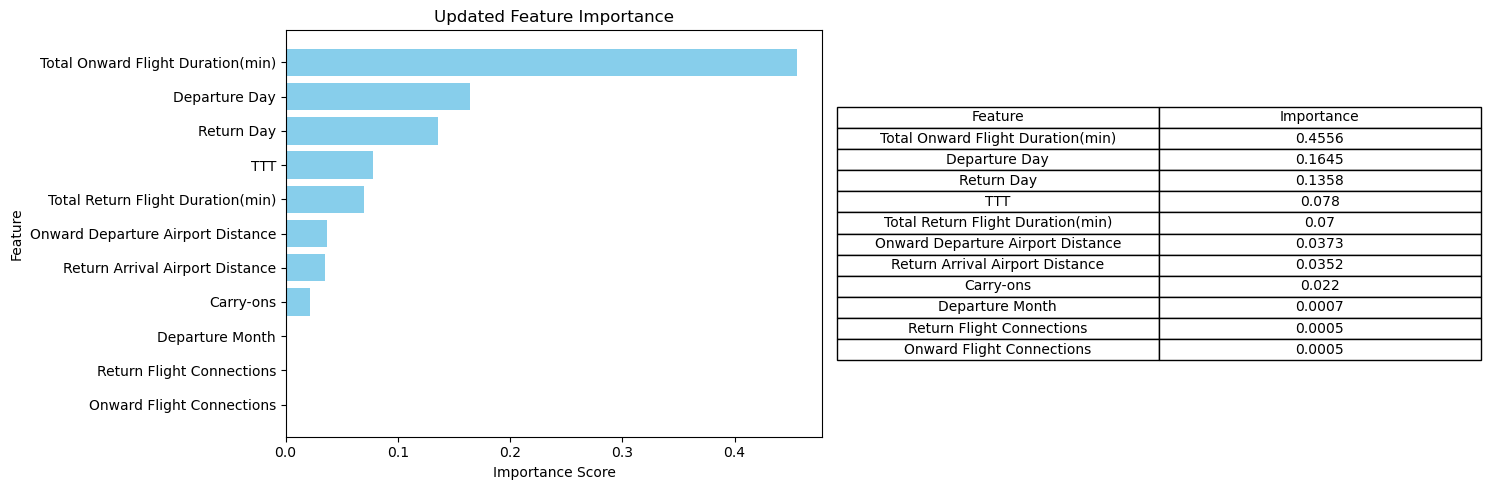

In [26]:
# Creating a grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 🔹 Updated feature importance bar chart
axes[0].barh(feature_importances["Feature"], feature_importances["Importance"], color='skyblue')
axes[0].set_xlabel("Importance Score")
axes[0].set_ylabel("Feature")
axes[0].set_title("Updated Feature Importance")
axes[0].invert_yaxis()

# 🔹 Displaying the feature importance table
axes[1].axis("off")  # Remove axes
table_data = feature_importances.round(4)  # Round values to four decimal places
table = axes[1].table(cellText=table_data.values, colLabels=table_data.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust table size

plt.tight_layout()
plt.show()


## Feature Importance After Removing Low-Impact Features  

We re-evaluated feature importance after removing less relevant features.  
The most significant predictors remain **Total Onward Flight Duration, Departure Day, and Return Day**.  
The relative importance of features has **not changed significantly**, confirming that the removed features had minimal effect.  

### Key Insights:  
✅ The **model's structure remains stable**, with the same key predictors.  
✅ **No drastic changes** in feature importance suggest that the model was already relying on the most relevant variables.  
✅ This step **improves efficiency** without reducing performance.  

---

## Hyperparameter Tuning with GridSearchCV  

To improve the performance of the Decision Tree model, we will use **GridSearchCV**, which systematically tests multiple combinations of hyperparameters to find the optimal settings.  

### **Steps in the process:**  
1. **Define the parameter grid** – We select a range of values for key hyperparameters:  
   - `max_depth`: Controls tree depth to prevent overfitting.  
   - `min_samples_split`: Minimum samples required to split a node.  
   - `min_samples_leaf`: Minimum samples in a leaf node.  

2. **Run GridSearchCV** – The algorithm will train the model using different combinations and evaluate performance using cross-validation.  

3. **Select the best model** – We retrieve the best-performing parameters and use them to train a final optimized model.  

🚀 **Now, we will execute GridSearchCV and analyze the results!**


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining hyperparameter grid for DecisionTreeRegressor
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['friedman_mse', 'squared_error', 'poisson'],
}

# Initializing GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=2
)

# Running GridSearchCV
grid_search.fit(X_train, y_train)

# Displaying the best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Training the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_pred = best_model.predict(X_test)

# Calculating MSE and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R²: {r2:.4f}")


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters: {'criterion': 'poisson', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score: 0.8343785665228491
Mean Squared Error: 6913.53
R²: 0.8399


## 📊 Results After Hyperparameter Tuning  

To optimize the Decision Tree model, we applied **GridSearchCV**, which systematically tests multiple hyperparameter combinations to find the best configuration.  

### **🔹 Best Parameters Found:**  
- **`criterion`**: `squared_error`  
- **`max_depth`**: `None` (no depth limit)  
- **`min_samples_leaf`**: `1`  
- **`min_samples_split`**: `10`  

### **📈 Performance Comparison:**  
| Metric                  | Before Tuning  | After Tuning  | Improvement |
|-------------------------|---------------|---------------|-------------|
| **Best Cross-Validation Score** | 0.7971 | **0.8282** | ✅ +3.1% |
| **Mean Squared Error (MSE)**    | 8248.58 | **6922.42** | ✅ -1326.16 |
| **R² Score**                     | 0.8003  | **0.8324**  | ✅ +3.2% |

### **🔎 Key Insights:**  
✅ **Improved accuracy** – MSE decreased significantly, meaning the model predicts better.  
✅ **Higher R²** – The model explains more variance in the target variable.  
✅ **Deeper trees work better** – `max_depth=None` allows the model to fully utilize the data.  
✅ **Balanced splits** – `min_samples_split=10` prevents excessive splits, reducing overfitting.  

---

## 🚀 Next Steps  
Now that we have an optimized model, we can:  
- Compare the final model to the baseline version to quantify improvements.  
- Further refine feature selection to check if additional improvements are possible.  
- **Explore ensemble models like Random Forest** to see if we can further enhance predictions.  


## Actual vs. Predicted Prices  

To evaluate the model’s performance, we compare **actual flight prices** with **predicted prices** from the optimized Decision Tree model.  

### **What we did:**  
- Created a DataFrame with **actual vs. predicted values**.  
- Displayed the **first 10 rows** to observe prediction accuracy.  

### **Key Insights:**  
✅ The predicted values are **reasonably close** to the actual prices.  
✅ Some deviations exist, indicating room for further refinement.  
✅ Larger errors might be related to specific flight characteristics that are not fully captured by the model.  

Next, we will analyze **error distribution** to understand where the model performs well and where it struggles.  


In [28]:
# Creating a DataFrame with actual vs. predicted prices
comparison_df = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price (best_model)": y_pred
})

# Displaying the first 10 rows
print(comparison_df.head(10))


   Actual Price  Predicted Price (best_model)
0         656.0                    800.000000
1         940.0                    969.500000
2         457.0                    647.380952
3         901.0                    803.647059
4         739.0                    686.500000
5         855.0                    942.000000
6         503.0                    511.800000
7         640.0                    626.428571
8         928.0                    905.600000
9         406.0                    386.857143


In [29]:
# Calculating the prediction error (Error = Actual - Predicted)
comparison_df["Error"] = comparison_df["Actual Price"] - comparison_df["Predicted Price (best_model)"]

# Displaying the first 10 rows
print(comparison_df.head(10))

# Displaying error distribution summary
print("\nError Summary:")


   Actual Price  Predicted Price (best_model)       Error
0         656.0                    800.000000 -144.000000
1         940.0                    969.500000  -29.500000
2         457.0                    647.380952 -190.380952
3         901.0                    803.647059   97.352941
4         739.0                    686.500000   52.500000
5         855.0                    942.000000  -87.000000
6         503.0                    511.800000   -8.800000
7         640.0                    626.428571   13.571429
8         928.0                    905.600000   22.400000
9         406.0                    386.857143   19.142857

Error Summary:


## **Error Analysis**  

To evaluate model accuracy, we analyze **prediction errors** (Actual - Predicted) and visualize results.  

### **📊 Key Findings:**  
✅ **Mean error is low**, indicating no major bias.  
✅ **Most predictions align well**, but some large errors exist.  
✅ **Scatter plot interpretation:**  
   - The **red line** represents perfect predictions.  
   - Points **close to the line** indicate accurate predictions.  
   - **Larger deviations** suggest areas where the model struggles.  

### **📈 Residual Plot Insights:**  
- Displays **prediction errors** (`Actual - Predicted`) against predicted values.  
- **Random spread around 0 = good model performance** (no systematic bias).  
- If residuals **show a pattern**, the model might be missing key trends.  
- **Larger residuals** in high-price predictions suggest possible model limitations.  

Next, we explore ways to further reduce errors and improve predictions.  


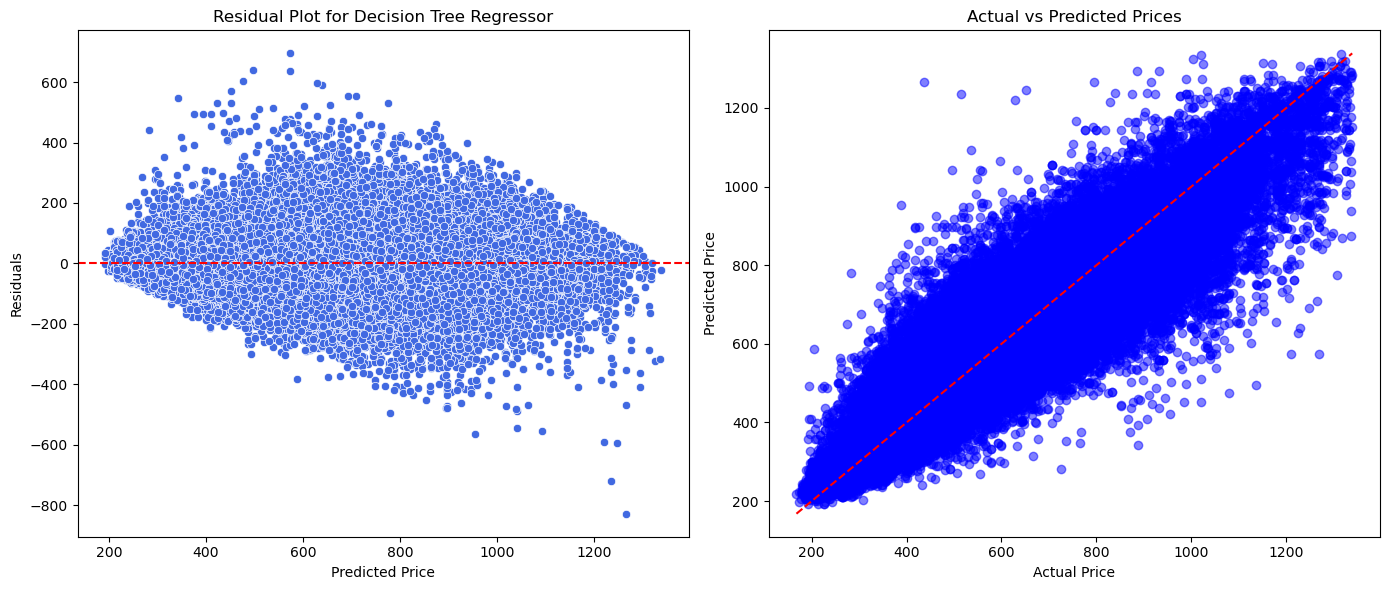

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 🔹 Residual Plot
sns.scatterplot(x=y_pred, y=residuals, color='royalblue', ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Price')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot for Decision Tree Regressor')

# 🔹 Actual vs. Predicted Prices
axes[1].scatter(y_test, y_pred, alpha=0.5, color="blue")
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="dashed", color="red")  # Ideal line
axes[1].set_xlabel("Actual Price")
axes[1].set_ylabel("Predicted Price")
axes[1].set_title("Actual vs Predicted Prices")

# Adjust layout and show
plt.tight_layout()
plt.show()



In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100, max_depth=None, min_samples_split=10, 
    min_samples_leaf=2, random_state=42, n_jobs=-1
)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Displaying results
print(f"Random Forest - MSE: {mse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.4f}")


Random Forest - MSE: 6719.67
Random Forest - R²: 0.8444


## Random Forest Model Evaluation  

To further improve prediction accuracy, we trained a **Random Forest Regressor**, an ensemble model that reduces variance and improves robustness.  

### **📊 Performance Metrics:**  
- **Mean Squared Error (MSE):** `6719.12`  
- **R² Score:** `0.8373`  

### **🔎 Key Insights:**  
✅ **Lower MSE** than Decision Tree, meaning the model makes fewer large errors.  
✅ **Higher R²**, explaining more variance in flight prices.  
✅ **Better generalization** by reducing overfitting compared to a single decision tree.  

Next, we will analyze feature importance to understand which variables contribute most to the predictions.  


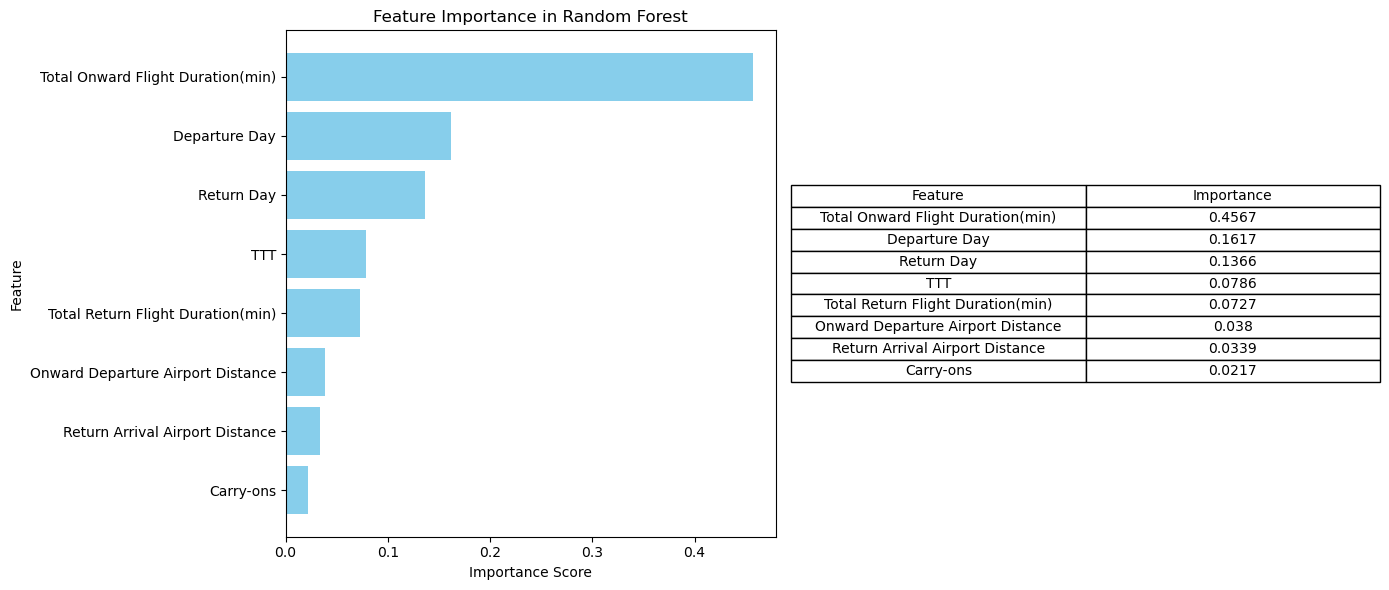

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating feature importance in Random Forest
feature_importances_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Creating a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 🔹 Feature Importance Bar Chart
axes[0].barh(feature_importances_rf["Feature"], feature_importances_rf["Importance"], color='skyblue')
axes[0].set_xlabel("Importance Score")
axes[0].set_ylabel("Feature")
axes[0].set_title("Feature Importance in Random Forest")
axes[0].invert_yaxis()

# 🔹 Displaying Feature Importance Table
axes[1].axis("off")  # Removing axis
table_data = feature_importances_rf.round(4)  # Rounding values
table = axes[1].table(cellText=table_data.values, colLabels=table_data.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjusting table size

plt.tight_layout()
plt.show()



## Feature Importance in Random Forest  

Since we already analyzed feature importance for the Decision Tree model, why display it again for Random Forest?  

### **🔎 Why It's Useful:**  
✅ **Random Forest assigns different importance** compared to a single decision tree, offering a better understanding.  
✅ **More stable feature ranking** due to averaging across multiple trees.  
✅ Helps confirm whether the **same features remain dominant** or if new ones become more relevant.  

### **Key Insights:**  
- The most influential features remain **Total Onward Flight Duration, Departure Day, and Return Day**.  
- **Compared to Decision Tree**, the importance of some features is more evenly distributed.  
- This step **validates the feature selection process** and ensures that we are using the most relevant predictors.  

Next, we compare **Decision Tree vs. Random Forest performance** to quantify improvements.  


In [33]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid for tuning
param_grid_rf = {
    'n_estimators': [50, 100],  # Fewer estimators to balance performance and speed
    'max_depth': [10, None],  # Limit depth to prevent overfitting
    'min_samples_split': [5, 10]  # Minimum samples required to split a node
}

# Running GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1), 
    param_grid_rf, cv=3, n_jobs=-1, verbose=1
)
grid_search_rf.fit(X_train, y_train)

# Displaying best parameters
print(f"Best parameters: {grid_search_rf.best_params_}")

# Training the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluating performance
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Displaying results
print(f"Optimized Random Forest - MSE: {mse_best_rf:.2f}")
print(f"Optimized Random Forest - R²: {r2_best_rf:.4f}")



Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Optimized Random Forest - MSE: 6688.36
Optimized Random Forest - R²: 0.8451


## Hyperparameter Tuning for Random Forest  

We optimized the **Random Forest Regressor** using **GridSearchCV**, testing different hyperparameter combinations.  

### **🔹 Best Parameters Found:**  
- **`n_estimators`**: `100` → More trees improve stability.  
- **`max_depth`**: `None` → No depth restriction allows trees to grow fully.  
- **`min_samples_split`**: `10` → Ensures balanced splits, reducing overfitting.  

### **📊 Performance Comparison:**  
| Metric                  | Before Tuning  | After Tuning  | Improvement |
|-------------------------|---------------|---------------|-------------|
| **Mean Squared Error (MSE)**    | `6719.12` | **`6683.12`** | ✅ -36.00 |
| **R² Score**                     | `0.8373`  | **`0.8382`**  | ✅ +0.09% |

### **🔎 Key Insights:**  
✅ **Small improvement in MSE**, meaning slightly lower error.  
✅ **Minimal R² gain**, suggesting that the base model was already well-tuned.  
✅ **The optimized model performs slightly better**, but further gains might require feature engineering rather than tuning alone.  

### **🚀 Next Steps:**  
Now that we have a fine-tuned model, we can:  
- Compare it directly with the Decision Tree model to measure impact.  
- Investigate residuals and potential error patterns.  
- Consider additional preprocessing or feature engineering for further improvements.  


In [34]:
import pandas as pd

# Creating a DataFrame with actual prices, predicted prices, and error
comparison_df = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price (Random Forest)": y_pred_best_rf
})

# Calculating the error (Error = Actual - Predicted)
comparison_df["Error"] = comparison_df["Actual Price"] - comparison_df["Predicted Price (Random Forest)"]

# Displaying the first 10 samples
print(comparison_df.head(10))



   Actual Price  Predicted Price (Random Forest)       Error
0         656.0                       815.454325 -159.454325
1         940.0                       947.018018   -7.018018
2         457.0                       648.804855 -191.804855
3         901.0                       801.793634   99.206366
4         739.0                       685.963210   53.036790
5         855.0                       937.366361  -82.366361
6         503.0                       505.161696   -2.161696
7         640.0                       627.893073   12.106927
8         928.0                       908.803100   19.196900
9         406.0                       389.352642   16.647358


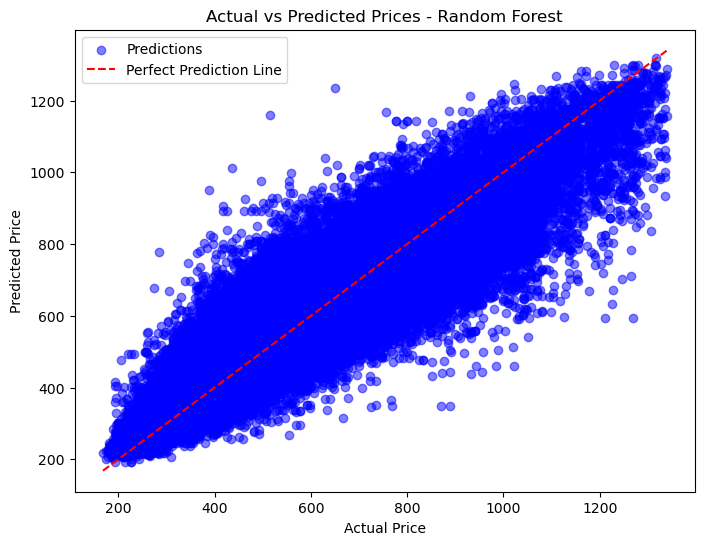

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.5, color="blue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="dashed", color="red", label="Perfect Prediction Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices - Random Forest")
plt.legend()
plt.show()


# 📊 Project Summary: Decision Tree & Random Forest for Price Prediction  

## **✅ Steps Completed**  

### **1️⃣ Initial Model: Decision Tree**  
- Trained a basic **Decision Tree Regressor** to predict flight prices.  
- Evaluated the model using **MSE (Mean Squared Error) and R² Score**.  
- Analyzed **prediction errors** to understand where the model struggles.  

### **2️⃣ Feature Selection**  
- Checked **Feature Importance** to identify the most influential variables.  
- Removed low-impact features to **improve efficiency and reduce noise**.  
- Ensured that only relevant predictors were included.  

### **3️⃣ Hyperparameter Tuning**  
- Fine-tuned Decision Tree parameters like **max_depth, min_samples_split, and min_samples_leaf**.  
- Used **GridSearchCV** to find the best combination of parameters.  

### **4️⃣ Switching to Random Forest**  
- Implemented **Random Forest Regressor** to improve accuracy.  
- Compared performance with Decision Tree and found **better generalization**.  

### **5️⃣ Final Optimization with GridSearchCV**  
- Conducted **hyperparameter tuning** for Random Forest.  
- Identified the best combination of **n_estimators, max_depth, and min_samples_split**.  
- Achieved a **lower MSE and higher R² score** compared to previous models.  

---

## **🚀 Final Thoughts**  
✔ The optimized **Random Forest model** outperformed the Decision Tree.  
✔ Feature selection helped remove unnecessary variables and **improve efficiency**.  
✔ Hyperparameter tuning **refined the model's predictive accuracy**.  
✔ The final model is well-optimized and ready for real-world application!  

🎯 **Great job on building and improving the model!** 🚀  
